# This Colab File Contains the code for:
### 1.  Creating model(Training, Testing) for Stress Analysis, based on the HRV parameters (from open source data)
**Stress levels**
1.   *No Stress* 
2.   *Interruption condition*
3.   *Time Pressure*











***Mounting drive in order to use files stored on google drive***

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


***Setting the path to appropriate directory.***

In [2]:
cd /content/drive/MyDrive/FYP/first/final/Saved_Model

/content/drive/MyDrive/FYP/first/final/Saved_Model


***Importing neccessary modules***

In [3]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # deluxe visualization library
import matplotlib.pyplot as plt # visualization library to support seaborn
%matplotlib inline


***Providing the path for*** *complete_data file* ***file stored in drive***

In [4]:
complete_data=pd.read_csv("/content/drive/MyDrive/FYP/first/final/Data/Training_data/complete_data.csv")
complete_data

,Unnamed: 0,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,...,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,sampen,higuci,datasetId,condition
0,0,885.157845,853.763730,140.972741,15.554505,15.553371,9.063146,69.499952,11.133333,0.533333,...,15.522603,0.421047,1.514737,3686.666157,65.018055,0.015380,2.139754,1.163485,2,no stress
1,1,939.425371,948.357865,81.317742,12.964439,12.964195,6.272369,64.363150,5.600000,0.000000,...,2.108525,0.070133,0.304603,3006.487251,327.296635,0.003055,2.174499,1.084711,2,interruption
2,2,898.186047,907.006860,84.497236,16.305279,16.305274,5.182201,67.450066,13.066667,0.200000,...,13.769729,0.512671,1.049528,2685.879461,94.280910,0.010607,2.135350,1.176315,2,interruption
3,3,881.757865,893.460030,90.370537,15.720468,15.720068,5.748591,68.809562,11.800000,0.133333,...,18.181913,0.529387,1.775294,3434.520980,55.328701,0.018074,2.178341,1.179688,2,no stress
4,4,809.625331,811.184865,62.766242,19.213819,19.213657,3.266724,74.565728,20.200000,0.200000,...,48.215822,1.839473,3.279993,2621.175204,29.487873,0.033912,2.221121,1.249612,2,no stress
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410317,41028,1118.406543,1117.857050,113.955632,18.592177,18.592071,6.129225,54.234182,18.800000,0.266667,...,0.347514,0.006813,0.035830,5100.718213,2789.962965,0.000358,2.183460,1.082927,2,time pressure
410318,41029,855.991173,765.221410,296.763366,20.623727,20.610745,14.389415,76.416971,15.733333,3.533333,...,118.014128,1.383097,8.622919,8532.599635,10.597001,0.094366,1.695327,1.154370,2,interruption
410319,41030,689.388662,663.192770,133.815714,21.699038,21.696138,6.166896,90.254005,13.933333,4.000000,...,216.200973,3.559302,10.160405,6074.251632,8.842128,0.113095,2.078000,1.214869,2,no stress
410320,41031,761.421571,761.064590,60.792671,11.280586,11.280573,5.389141,79.313782,2.733333,0.266667,...,41.797177,3.124367,6.905613,1337.780773,13.480973,0.074179,2.191379,1.234546,2,no stress


***Basic Data Analysis***


1. Info about the data(presence of any null values,checking data types of features)

In [5]:
complete_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410322 entries, 0 to 410321
Data columns (total 37 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         410322 non-null  int64  
 1   MEAN_RR            410322 non-null  float64
 2   MEDIAN_RR          410322 non-null  float64
 3   SDRR               410322 non-null  float64
 4   RMSSD              410322 non-null  float64
 5   SDSD               410322 non-null  float64
 6   SDRR_RMSSD         410322 non-null  float64
 7   HR                 410322 non-null  float64
 8   pNN25              410322 non-null  float64
 9   pNN50              410322 non-null  float64
 10  SD1                410322 non-null  float64
 11  SD2                410322 non-null  float64
 12  KURT               410322 non-null  float64
 13  SKEW               410322 non-null  float64
 14  MEAN_REL_RR        410322 non-null  float64
 15  MEDIAN_REL_RR      410322 non-null  float64
 16  SD

2. Filtering dataset as per the requirement (i.e. taking required features into consideration)

In [6]:
complete_data_new=complete_data[["MEAN_RR", "MEDIAN_RR", "SDRR", "RMSSD", "SDSD", "HR", "pNN25", "pNN50","condition"]]
complete_data_new

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,HR,pNN25,pNN50,condition
0,885.157845,853.763730,140.972741,15.554505,15.553371,69.499952,11.133333,0.533333,no stress
1,939.425371,948.357865,81.317742,12.964439,12.964195,64.363150,5.600000,0.000000,interruption
2,898.186047,907.006860,84.497236,16.305279,16.305274,67.450066,13.066667,0.200000,interruption
3,881.757865,893.460030,90.370537,15.720468,15.720068,68.809562,11.800000,0.133333,no stress
4,809.625331,811.184865,62.766242,19.213819,19.213657,74.565728,20.200000,0.200000,no stress
...,...,...,...,...,...,...,...,...,...
410317,1118.406543,1117.857050,113.955632,18.592177,18.592071,54.234182,18.800000,0.266667,time pressure
410318,855.991173,765.221410,296.763366,20.623727,20.610745,76.416971,15.733333,3.533333,interruption
410319,689.388662,663.192770,133.815714,21.699038,21.696138,90.254005,13.933333,4.000000,no stress
410320,761.421571,761.064590,60.792671,11.280586,11.280573,79.313782,2.733333,0.266667,no stress


3. Statistical Analysis of Numerical features

In [ ]:
complete_data_new.describe()

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,HR,pNN25,pNN50
count,410322.000000,410322.000000,410322.000000,410322.000000,410322.000000,410322.000000,410322.000000,410322.000000
mean,846.670724,841.980595,109.302941,14.978707,14.977976,73.937573,9.845863,0.865656
std,124.585711,132.286414,77.065738,4.122602,4.122605,10.335769,8.202293,0.989847
min,547.483802,517.293295,27.233947,5.529742,5.529630,48.736986,0.000000,0.000000
25%,760.243974,755.749505,64.196632,11.831264,11.831056,66.707281,3.666667,0.000000
50%,822.916027,819.669975,82.624288,14.417202,14.416616,74.217815,7.600000,0.466667
75%,924.220881,917.009455,118.193410,17.931444,17.929922,80.330105,13.333333,1.400000
max,1322.016957,1653.122250,563.486949,26.629477,26.629392,113.754253,39.400000,5.466667


4. Distribution of Stress levels

In [ ]:
complete_data_new.condition.value_counts()

no stress        222240
interruption     116932
time pressure     71150
Name: condition, dtype: int64

***Exploratory Data Analysis***

1. Plots of Stress Condition against different features

<AxesSubplot: xlabel='condition', ylabel='pNN50'>

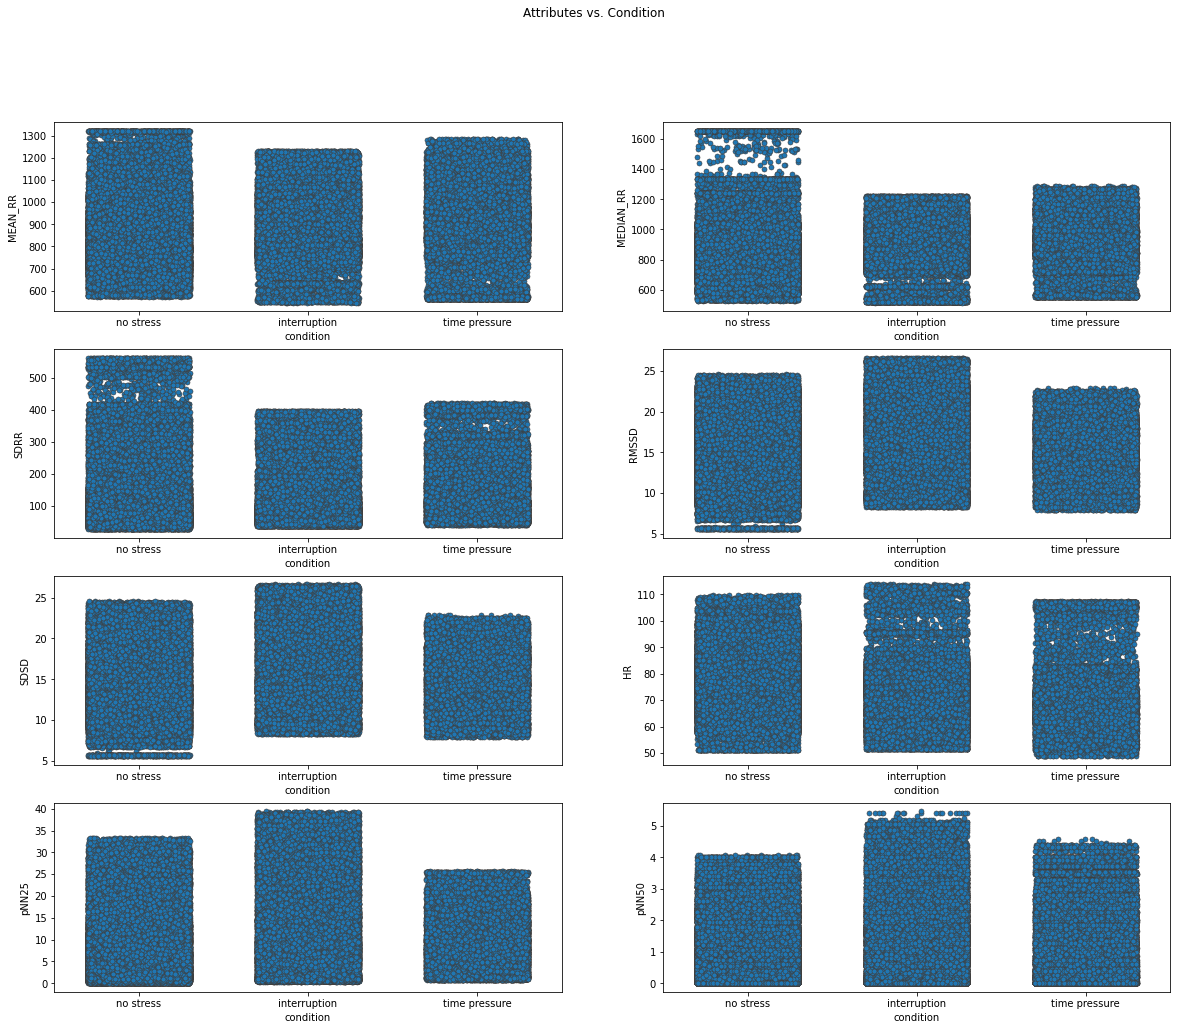

In [ ]:
# grid for multiple seaborn plots
fig, axes = plt.subplots(4,2,figsize=(20,16))
fig.suptitle('Attributes vs. Condition')
sns.set_style('whitegrid');

# MEAN_RR vs. 'condition'
sns.stripplot(x=complete_data_new.condition, y=complete_data_new.MEAN_RR, linewidth=0.6, jitter= 0.3, ax=axes[0, 0])
# MEDIAN_RR vs. 'condition'
sns.stripplot(x=complete_data_new.condition, y=complete_data_new.MEDIAN_RR, linewidth=0.6, jitter= 0.3, ax=axes[0, 1])
# SDRR vs. 'condition'
sns.stripplot(x=complete_data_new.condition, y=complete_data_new.SDRR, linewidth=0.6, jitter= 0.3, ax=axes[1, 0])
# RMSSD vs. 'condition'
sns.stripplot(x=complete_data_new.condition, y=complete_data_new.RMSSD, linewidth=0.6, jitter= 0.3, ax=axes[1, 1])
# SDSD vs. 'condition'
sns.stripplot(x=complete_data_new.condition, y=complete_data_new.SDSD, linewidth=0.6, jitter= 0.3, ax=axes[2, 0])
# HR vs. 'condition'
sns.stripplot(x=complete_data_new.condition, y=complete_data_new.HR, linewidth=0.6, jitter= 0.3, ax=axes[2, 1])
# pNN25 vs. 'condition'
sns.stripplot(x=complete_data_new.condition, y=complete_data_new.pNN25, linewidth=0.6, jitter= 0.3, ax=axes[3, 0])
# pNN50vs. 'condition'
sns.stripplot(x=complete_data_new.condition, y=complete_data_new.pNN50, linewidth=0.6, jitter= 0.3, ax=axes[3, 1])

2. Finding Correlation between features-features & features-target(Condition) using heatmap

In [ ]:
#!pip install ipython==7.9.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


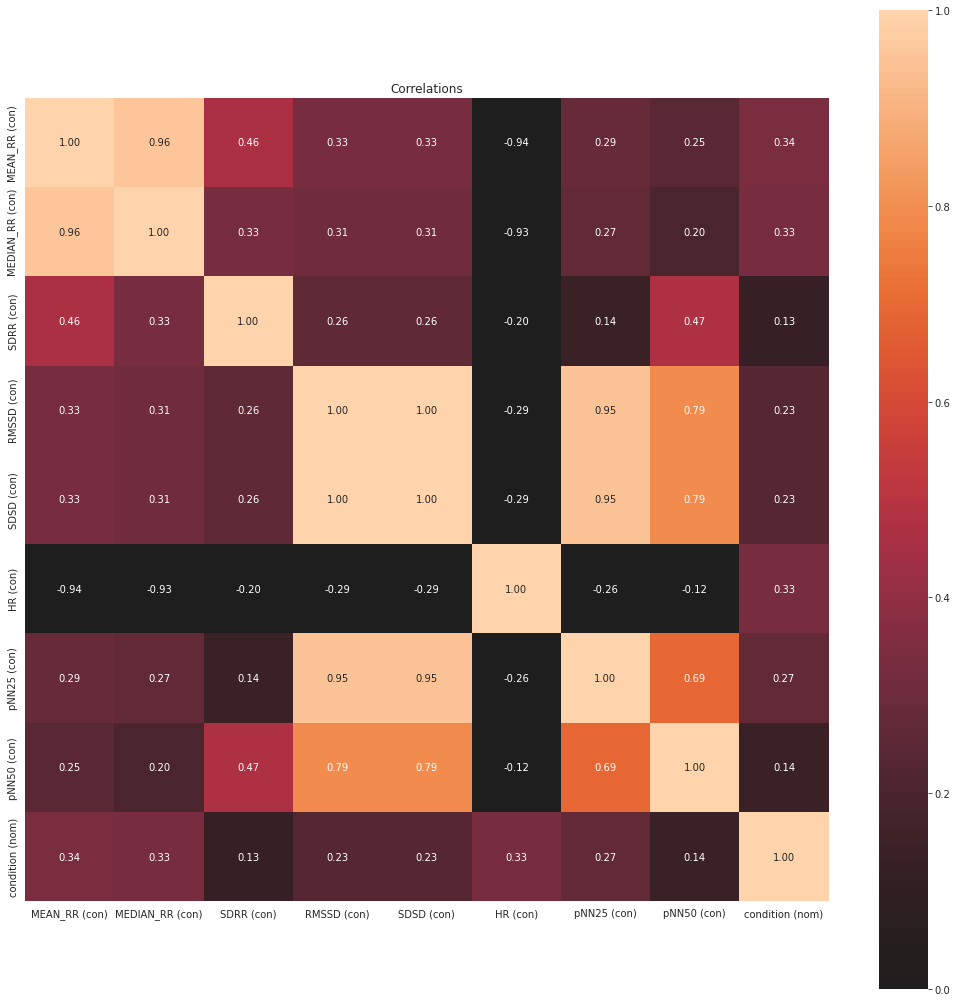

In [ ]:
!pip install dython
import dython
from dython.nominal import associations
from dython.nominal import identify_nominal_columns

categorical_features = identify_nominal_columns(complete_data_new)

associations(complete_data_new, 
            nominal_columns='condition', mark_columns=True, num_num_assoc='pearson',nom_num_assoc='correlation_ratio',  
            ax=None, annot=True, fmt='.2f',cmap=None, sv_color='silver', cbar=True, vmax=1.0, vmin=None, plot=True, 
            compute_only=False, title='Correlations', filename=None, 
            figsize=(18,18));

3. Handling Outliers

In [ ]:

# MEAN_RR
Q1_MEAN_RR = complete_data_new['MEAN_RR'].quantile(0.25)
Q3_MEAN_RR = complete_data_new['MEAN_RR'].quantile(0.75)
IQR_MEAN_RR = Q3_MEAN_RR - Q1_MEAN_RR
under_MEAN_RR = complete_data_new['MEAN_RR'] < (Q1_MEAN_RR - 3 * IQR_MEAN_RR)
upper_MEAN_RR = complete_data_new['MEAN_RR'] > (Q3_MEAN_RR + 3 * IQR_MEAN_RR)
print('MEAN_RR:', 'lower outliers -', sum(under_MEAN_RR), ' | upper outliers -', sum(upper_MEAN_RR))

# MEDIAN_RR
Q1_MEDIAN_RR = complete_data_new['MEDIAN_RR'].quantile(0.25)
Q3_MEDIAN_RR = complete_data_new['MEDIAN_RR'].quantile(0.75)
IQR_MEDIAN_RR = Q3_MEDIAN_RR - Q1_MEDIAN_RR
under_MEDIAN_RR = complete_data_new['MEDIAN_RR'] < (Q1_MEDIAN_RR - 3 * IQR_MEDIAN_RR)
upper_MEDIAN_RR = complete_data_new['MEDIAN_RR'] > (Q3_MEDIAN_RR+ 3 * IQR_MEDIAN_RR)
print('MEDIAN_RR:', 'lower outliers -', sum(under_MEDIAN_RR), ' | upper outliers -', sum(upper_MEDIAN_RR))

# SDRR
Q1_SDRR = complete_data_new['SDRR'].quantile(0.25)
Q3_SDRR = complete_data_new['SDRR'].quantile(0.75)
IQR_SDRR= Q3_SDRR - Q1_SDRR
under_SDRR = complete_data_new['SDRR'] < (Q1_SDRR - 3 * IQR_SDRR)
upper_SDRR = complete_data_new['SDRR'] > (Q3_SDRR + 3 * IQR_SDRR)
print('SDRR:', 'lower outliers -', sum(under_SDRR), ' | upper outliers -', sum(upper_SDRR))

# RMSSD
Q1_RMSSD = complete_data_new['RMSSD'].quantile(0.25)
Q3_RMSSD = complete_data_new['RMSSD'].quantile(0.75)
IQR_RMSSD = Q3_RMSSD - Q1_RMSSD
under_RMSSD = complete_data_new['RMSSD'] < (Q1_RMSSD - 3 * IQR_RMSSD)
upper_RMSSD = complete_data_new['RMSSD'] > (Q3_RMSSD + 3 * IQR_RMSSD)
print('RMSSD:', 'lower outliers -', sum(under_RMSSD), ' | upper outliers -', sum(upper_RMSSD))

# SDSD
Q1_SDSD = complete_data_new['SDSD'].quantile(0.25)
Q3_SDSD = complete_data_new['SDSD'].quantile(0.75)
IQR_SDSD = Q3_SDSD - Q1_SDSD
under_SDSD = complete_data_new['SDSD'] < (Q1_SDSD - 3 * IQR_SDSD)
upper_SDSD = complete_data_new['SDSD'] > (Q3_SDSD + 3 * IQR_SDSD)
print('SDSD:', 'lower outliers -', sum(under_SDSD), ' | upper outliers -', sum(upper_SDSD))

# HR
Q1_HR = complete_data_new['HR'].quantile(0.25)
Q3_HR = complete_data_new['HR'].quantile(0.75)
IQR_HR = Q3_HR - Q1_HR
under_HR = complete_data_new['HR'] < (Q1_HR - 3 * IQR_HR)
upper_HR = complete_data_new['HR'] > (Q3_HR + 3 * IQR_HR)
print('HR:', 'lower outliers -', sum(under_HR), ' | upper outliers -', sum(upper_HR))

# pNN50
Q1_pNN50 = complete_data_new['pNN50'].quantile(0.25)
Q3_pNN50 = complete_data_new['pNN50'].quantile(0.75)
IQR_pNN50 = Q3_pNN50 - Q1_pNN50
under_pNN50 = complete_data_new['pNN50'] < (Q1_pNN50 - 3 * IQR_pNN50)
upper_pNN50 = complete_data_new['pNN50'] > (Q3_pNN50 + 3 * IQR_pNN50)
print('pNN50:', 'lower outliers -', sum(under_pNN50), ' | upper outliers -', sum(upper_pNN50))

# pNN25
Q1_pNN25 = complete_data_new['pNN25'].quantile(0.25)
Q3_pNN25 = complete_data_new['pNN25'].quantile(0.75)
IQR_pNN25 = Q3_pNN25 - Q1_pNN25
under_pNN25 = complete_data_new['pNN25'] < (Q1_pNN25 - 3 * IQR_pNN25)
upper_pNN25 = complete_data_new['pNN25'] > (Q3_pNN25 + 3 * IQR_pNN25)
print('pNN25:', 'lower outliers -', sum(under_pNN25), ' | upper outliers -', sum(upper_pNN25))

MEAN_RR: lower outliers - 0  | upper outliers - 0
MEDIAN_RR: lower outliers - 0  | upper outliers - 818
SDRR: lower outliers - 0  | upper outliers - 24276
RMSSD: lower outliers - 0  | upper outliers - 0
SDSD: lower outliers - 0  | upper outliers - 0
HR: lower outliers - 0  | upper outliers - 0
pNN50: lower outliers - 0  | upper outliers - 0
pNN25: lower outliers - 0  | upper outliers - 0


***Building ML model-XGboost***

In [ ]:
#Preprocessing for XGBoost
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.metrics import balanced_accuracy_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.utils.class_weight import compute_sample_weight

xgbDF = complete_data_new
condns = {'no stress': 0,
             'time pressure': 1, 
             'interruption': 2}

xgbDF['condition'] = xgbDF['condition'].map(condns) # re-mapping


X = xgbDF.drop('condition', axis=1).copy()
y = xgbDF['condition'].copy()

# splitting complete data into " stratified" train and test split 
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42, stratify=y)

<ipython-input-13-5bcdc4b8f4bc>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xgbDF['condition'] = xgbDF['condition'].map(condns) # re-mapping


**1. XGBoost model v1 (base run of model with default hyperparameters)**

In [ ]:

xgb_clf_v1 = xgb.XGBClassifier(objective='multi:softmax', 
                            num_class=3, 
                            missing=1, 
                            early_stopping_rounds=10, 
                            eval_metric=['merror','mlogloss'], 
                            seed=42)
xgb_clf_v1.fit(X_train, 
            y_train,
            verbose=1, # set to 1 to see xgb training round intermediate results
            eval_set=[(X_train, y_train), (X_test, y_test)])




[0]	validation_0-merror:0.356842	validation_0-mlogloss:1.05557	validation_1-merror:0.358213	validation_1-mlogloss:1.05638
[1]	validation_0-merror:0.35569	validation_0-mlogloss:1.01978	validation_1-merror:0.356321	validation_1-mlogloss:1.01994
[2]	validation_0-merror:0.347261	validation_0-mlogloss:0.986361	validation_1-merror:0.34775	validation_1-mlogloss:0.986873
[3]	validation_0-merror:0.35616	validation_0-mlogloss:0.958558	validation_1-merror:0.356654	validation_1-mlogloss:0.958791
[4]	validation_0-merror:0.355477	validation_0-mlogloss:0.933558	validation_1-merror:0.355825	validation_1-mlogloss:0.933959
[5]	validation_0-merror:0.358311	validation_0-mlogloss:0.912184	validation_1-merror:0.358222	validation_1-mlogloss:0.912539
[6]	validation_0-merror:0.35522	validation_0-mlogloss:0.892805	validation_1-merror:0.355492	validation_1-mlogloss:0.892889
[7]	validation_0-merror:0.3539	validation_0-mlogloss:0.874606	validation_1-merror:0.354005	validation_1-mlogloss:0.87527
[8]	validation_0-me

XGBClassifier(early_stopping_rounds=10, eval_metric=['merror', 'mlogloss'],
              missing=1, num_class=3, objective='multi:softprob', seed=42)

---**Evaluation Metrics and Plots**---

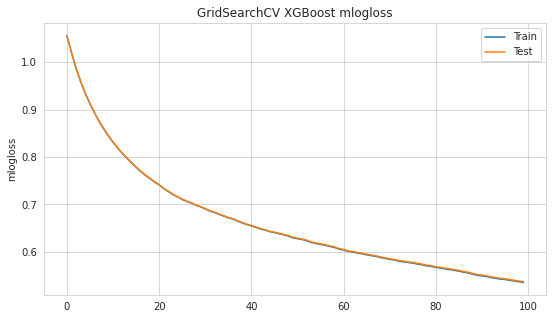

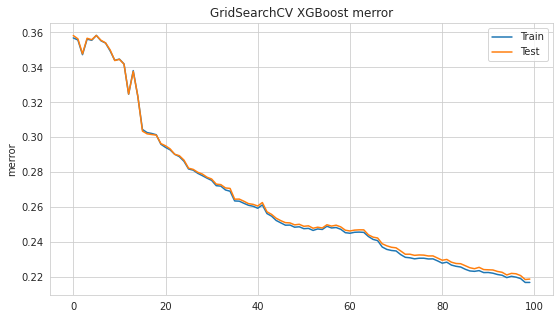

In [ ]:
# preparing evaluation metric plots
results = xgb_clf_v1.evals_result()
epochs = len(results['validation_0']['mlogloss'])
x_axis = range(0, epochs)

# xgboost 'mlogloss' plot
fig, ax = plt.subplots(figsize=(9,5))
ax.plot(x_axis, results['validation_0']['mlogloss'], label='Train')
ax.plot(x_axis, results['validation_1']['mlogloss'], label='Test')
ax.legend()
plt.ylabel('mlogloss')
plt.title('GridSearchCV XGBoost mlogloss')
plt.show()

# xgboost 'merror' plot
fig, ax = plt.subplots(figsize=(9,5))
ax.plot(x_axis, results['validation_0']['merror'], label='Train')
ax.plot(x_axis, results['validation_1']['merror'], label='Test')
ax.legend()
plt.ylabel('merror')
plt.title('GridSearchCV XGBoost merror')
plt.show()


---**Model Classification Report**---

In [ ]:

y_pred = xgb_clf_v1.predict(X_test)

print('\n------------------ Confusion Matrix -----------------\n')
print(confusion_matrix(y_test, y_pred))

print('\n-------------------- Key Metrics --------------------')
print('\nAccuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Balanced Accuracy: {:.2f}\n'.format(balanced_accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

print('\n--------------- Classification Report ---------------\n')
print(classification_report(y_test, y_pred))
print('---------------------- XGBoost ----------------------') 


------------------ Confusion Matrix -----------------

[[61984  1820  2868]
 [ 8482 11547  1316]
 [ 9693  2760 22627]]

-------------------- Key Metrics --------------------

Accuracy: 0.78
Balanced Accuracy: 0.71

Micro Precision: 0.78
Micro Recall: 0.78
Micro F1-score: 0.78

Macro Precision: 0.78
Macro Recall: 0.71
Macro F1-score: 0.73

Weighted Precision: 0.78
Weighted Recall: 0.78
Weighted F1-score: 0.77

--------------- Classification Report ---------------

              precision    recall  f1-score   support

           0       0.77      0.93      0.84     66672
           1       0.72      0.54      0.62     21345
           2       0.84      0.65      0.73     35080

    accuracy                           0.78    123097
   macro avg       0.78      0.71      0.73    123097
weighted avg       0.78      0.78      0.77    123097

---------------------- XGBoost ----------------------


***2. XGBoost model v2 (second run of model with "optimized" hyperparameters)*** 

In [ ]:
# declaring and fitting xgb classifier
xgb_clf_v2 = xgb.XGBClassifier(objective='multi:softmax', 
                            num_class=3, 
                            missing=1,
                            gamma=0, # default gamma value
                            learning_rate=0.1,
                            max_depth=3,
                            reg_lambda=1, # default L2 value
                            subsample=1, # default subsample value
                            colsample_bytree=1, # default colsample_bytree value
                            early_stopping_rounds=10,
                            eval_metric=['merror','mlogloss'],
                            seed=42)
xgb_clf_v2.fit(X_train, 
            y_train,
            verbose=1, # set to 1 to see xgb training round intermediate results
            #sample_weight=sample_weights, # class weights to combat unbalanced 'target'
            eval_set=[(X_train, y_train), (X_test, y_test)])


[0]	validation_0-merror:0.356842	validation_0-mlogloss:1.05557	validation_1-merror:0.358213	validation_1-mlogloss:1.05638
[1]	validation_0-merror:0.35569	validation_0-mlogloss:1.01978	validation_1-merror:0.356321	validation_1-mlogloss:1.01994
[2]	validation_0-merror:0.347261	validation_0-mlogloss:0.986361	validation_1-merror:0.34775	validation_1-mlogloss:0.986873
[3]	validation_0-merror:0.35616	validation_0-mlogloss:0.958558	validation_1-merror:0.356654	validation_1-mlogloss:0.958791
[4]	validation_0-merror:0.355477	validation_0-mlogloss:0.933558	validation_1-merror:0.355825	validation_1-mlogloss:0.933959
[5]	validation_0-merror:0.358311	validation_0-mlogloss:0.912184	validation_1-merror:0.358222	validation_1-mlogloss:0.912539
[6]	validation_0-merror:0.35522	validation_0-mlogloss:0.892805	validation_1-merror:0.355492	validation_1-mlogloss:0.892889
[7]	validation_0-merror:0.3539	validation_0-mlogloss:0.874606	validation_1-merror:0.354005	validation_1-mlogloss:0.87527
[8]	validation_0-me

XGBClassifier(early_stopping_rounds=10, eval_metric=['merror', 'mlogloss'],
              missing=1, num_class=3, objective='multi:softprob', seed=42)

---**Evaluation Metrics and Plots**---

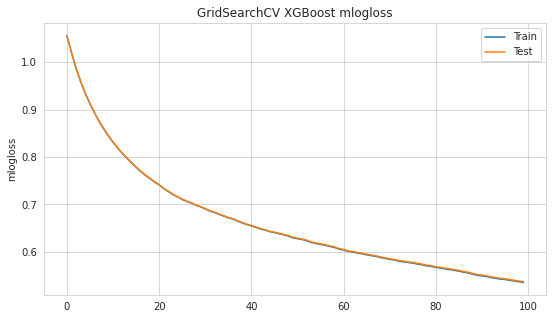

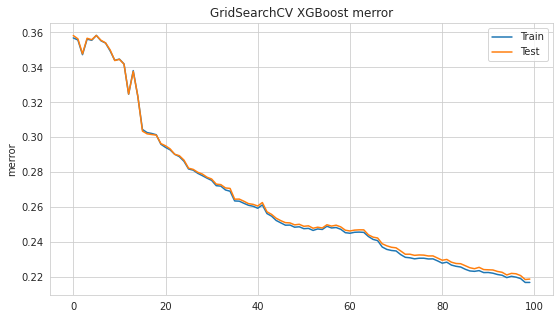

In [ ]:
# preparing evaluation metric plots
results = xgb_clf_v2.evals_result()
epochs = len(results['validation_0']['mlogloss'])
x_axis = range(0, epochs)

# xgboost 'mlogloss' plot
fig, ax = plt.subplots(figsize=(9,5))
ax.plot(x_axis, results['validation_0']['mlogloss'], label='Train')
ax.plot(x_axis, results['validation_1']['mlogloss'], label='Test')
ax.legend()
plt.ylabel('mlogloss')
plt.title('GridSearchCV XGBoost mlogloss')
plt.show()

# xgboost 'merror' plot
fig, ax = plt.subplots(figsize=(9,5))
ax.plot(x_axis, results['validation_0']['merror'], label='Train')
ax.plot(x_axis, results['validation_1']['merror'], label='Test')
ax.legend()
plt.ylabel('merror')
plt.title('GridSearchCV XGBoost merror')
plt.show()

---**Model Classification Report**---

In [ ]:

y_pred = xgb_clf_v2.predict(X_test)

print('\n------------------ Confusion Matrix -----------------\n')
print(confusion_matrix(y_test, y_pred))

print('\nAccuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Balanced Accuracy: {:.2f}\n'.format(balanced_accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

print('\n--------------- Classification Report ---------------\n')
print(classification_report(y_test, y_pred))


------------------ Confusion Matrix -----------------

[[61984  1820  2868]
 [ 8482 11547  1316]
 [ 9693  2760 22627]]

Accuracy: 0.78
Balanced Accuracy: 0.71

Micro Precision: 0.78
Micro Recall: 0.78
Micro F1-score: 0.78

Macro Precision: 0.78
Macro Recall: 0.71
Macro F1-score: 0.73

Weighted Precision: 0.78
Weighted Recall: 0.78
Weighted F1-score: 0.77

--------------- Classification Report ---------------

              precision    recall  f1-score   support

           0       0.77      0.93      0.84     66672
           1       0.72      0.54      0.62     21345
           2       0.84      0.65      0.73     35080

    accuracy                           0.78    123097
   macro avg       0.78      0.71      0.73    123097
weighted avg       0.78      0.78      0.77    123097



***3. XGBoost Model v3 (third run of model with "optimized" hyperparameters and an attempt to treat unbalanced target classes)***

In [ ]:

# balancing 'target' class weights
sample_weights = compute_sample_weight(
    class_weight='balanced',
    y=y_train)

# declaring and fitting xgb classifier
xgb_clf_v3 = xgb.XGBClassifier(objective='multi:softmax', 
                            num_class=3, 
                            missing=1,
                            gamma=0, # default gamma value
                            learning_rate=0.1,
                            max_depth=5, # re-optimized from v2
                            reg_lambda=1, # default L2 value
                            #subsample=0.8, # tried but not ideal
                            #colsample_bytree=0.3, # tried but not ideal
                            early_stopping_rounds=10,
                            eval_metric=['merror','mlogloss'],
                            seed=42)

xgb_clf_v3.fit(X_train, 
            y_train,
            verbose=1, # set to 1 to see xgb training round intermediate results
            sample_weight=sample_weights, # class weights to combat unbalanced 'target'
            eval_set=[(X_train, y_train), (X_test, y_test)])


[0]	validation_0-merror:0.325633	validation_0-mlogloss:1.04799	validation_1-merror:0.326458	validation_1-mlogloss:1.04835
[1]	validation_0-merror:0.314617	validation_0-mlogloss:1.00405	validation_1-merror:0.315312	validation_1-mlogloss:1.00426
[2]	validation_0-merror:0.308664	validation_0-mlogloss:0.966645	validation_1-merror:0.310666	validation_1-mlogloss:0.966732
[3]	validation_0-merror:0.317382	validation_0-mlogloss:0.933309	validation_1-merror:0.317595	validation_1-mlogloss:0.933705
[4]	validation_0-merror:0.312219	validation_0-mlogloss:0.904012	validation_1-merror:0.313127	validation_1-mlogloss:0.904885
[5]	validation_0-merror:0.29408	validation_0-mlogloss:0.877202	validation_1-merror:0.295832	validation_1-mlogloss:0.87796
[6]	validation_0-merror:0.293505	validation_0-mlogloss:0.852367	validation_1-merror:0.294215	validation_1-mlogloss:0.852933
[7]	validation_0-merror:0.293321	validation_0-mlogloss:0.830078	validation_1-merror:0.294012	validation_1-mlogloss:0.830931
[8]	validation

XGBClassifier(early_stopping_rounds=10, eval_metric=['merror', 'mlogloss'],
              max_depth=5, missing=1, num_class=3, objective='multi:softprob',
              seed=42)

---**Evaluation Metrics and Plots**---

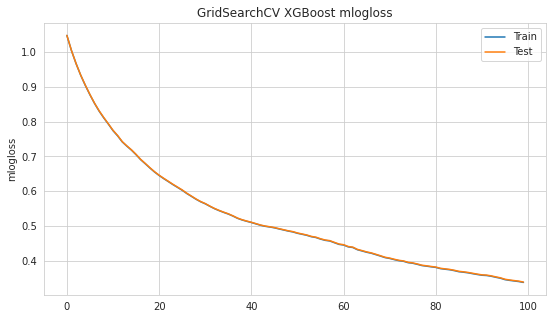

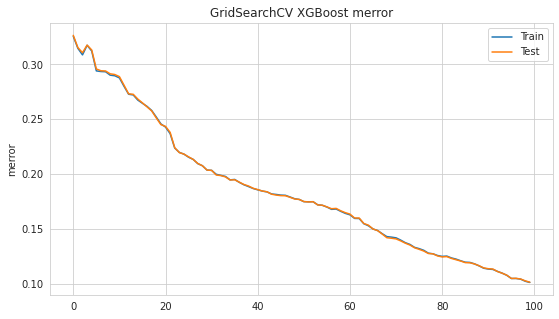

In [ ]:

results = xgb_clf_v3.evals_result()
epochs = len(results['validation_0']['mlogloss'])
x_axis = range(0, epochs)

# xgboost 'mlogloss' plot
fig, ax = plt.subplots(figsize=(9,5))
ax.plot(x_axis, results['validation_0']['mlogloss'], label='Train')
ax.plot(x_axis, results['validation_1']['mlogloss'], label='Test')
ax.legend()
plt.ylabel('mlogloss')
plt.title('GridSearchCV XGBoost mlogloss')
plt.show()

# xgboost 'merror' plot
fig, ax = plt.subplots(figsize=(9,5))
ax.plot(x_axis, results['validation_0']['merror'], label='Train')
ax.plot(x_axis, results['validation_1']['merror'], label='Test')
ax.legend()
plt.ylabel('merror')
plt.title('GridSearchCV XGBoost merror')
plt.show()

---**Model Classification Report**---

In [ ]:

y_pred = xgb_clf_v3.predict(X_test)

print('\n------------------ Confusion Matrix -----------------\n')
print(confusion_matrix(y_test, y_pred))

print('\nAccuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Balanced Accuracy: {:.2f}\n'.format(balanced_accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

print('\n--------------- Classification Report ---------------\n')
print(classification_report(y_test, y_pred))


------------------ Confusion Matrix -----------------

[[57491  5421  3760]
 [  233 20982   130]
 [ 1497  1465 32118]]

Accuracy: 0.90
Balanced Accuracy: 0.92

Micro Precision: 0.90
Micro Recall: 0.90
Micro F1-score: 0.90

Macro Precision: 0.87
Macro Recall: 0.92
Macro F1-score: 0.89

Weighted Precision: 0.91
Weighted Recall: 0.90
Weighted F1-score: 0.90

--------------- Classification Report ---------------

              precision    recall  f1-score   support

           0       0.97      0.86      0.91     66672
           1       0.75      0.98      0.85     21345
           2       0.89      0.92      0.90     35080

    accuracy                           0.90    123097
   macro avg       0.87      0.92      0.89    123097
weighted avg       0.91      0.90      0.90    123097



***Plotting Feature importance for best XGboost Model - xgb_clf_v3***

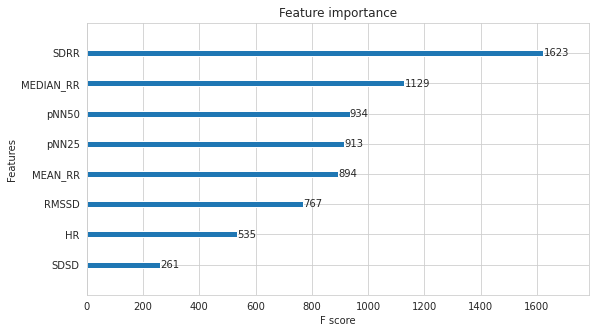

In [ ]:
from xgboost import plot_importance

fig, ax = plt.subplots(figsize=(9,5))
plot_importance(xgb_clf_v3, ax=ax)
plt.show()


***plotting model tree of best xgboost model (xgb_clf_v3)***

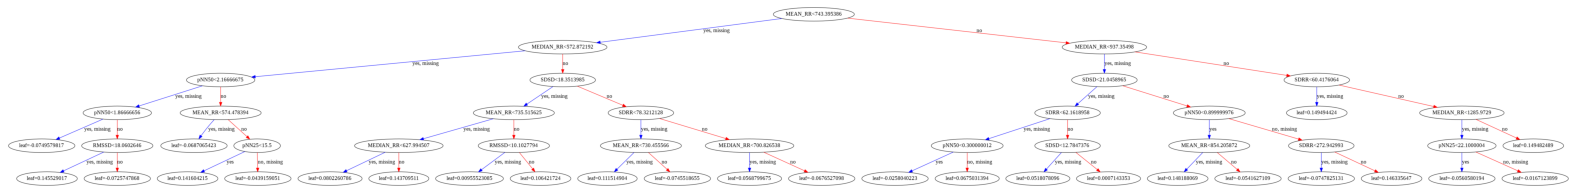

In [ ]:
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 28,12
xgb.plot_tree(xgb_clf_v3)
plt.show()


***Saving the xgb_clf_v3 model in order to use it for further predictions etc.***

In [ ]:
import pickle
file_name = "xgb_clf.pkl"

# save
pickle.dump(xgb_clf_v3, open(file_name, "wb"))

# load
#xgb_clf_v3_loaded = pickle.load(open(file_name, "rb"))

-----------------------------------------------------------------------